# Исследование данных о продаже компьютерных игр 
Перед нами данные до 2016 года. Исходя из этих данных нам необходимо спланировать кампанию на 2017-й. 
Для этого мы должны выбрать потенциально самую прибыльную платформу. Проверить Какой жанр является наиболее популярным.
Отдельно изучим пользователей по разным странам, их любимые жанры и платформы 

## открываем файл с данными и изучите общую информацию.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats as st
try:
    data = pd.read_csv ('/datasets/games.csv')
except: 
    data = pd.read_csv ('games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Мы загрузили файл, сохранили его в датафрайм data и вывели на печать первые 5 строк

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
# Вывели информация о датафрайме что бы увидеть название столбцов количество строк с данными и тип данных
# в соответствующих строках
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [4]:
# Приводим название столбцов к нижнему регистру что бы соответствовать «змеиному стилю» применив метод «str.lower()» 

data.columns = data.columns.str.lower()

In [5]:
# Для проверки повторно вывели информацию призвав метод инфо
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Мы посмотрели на данные в первом приближении, видим пропуски, посмотрим что можно сделать в разделе предобработки данных 
В названии столбцов были применены большие буквы, что мы успешно заменили  и

### Предобработка данных

In [6]:
# Проверили на наличие явных дубликатов и не обнаружили их
data.duplicated().sum()

0

In [7]:
# Начинаем обрабатывать пропуски и нереалистичные значения. 
# Для этого вызовем все уникальные значения в столбце, для удобства восприятия отсортируем их в порядка возрастания
data['name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

In [8]:
# Видим что есть как большие так и маленькие буквы в названиях игр, 
# приведём все названия к нижнему регистру, пригодится для поиска возможных дубликатов
data['name']=data['name'].str.lower()

In [9]:
# Узнаем сколько игр с одним и тем же названием при помощи метода «value_counts()» 
data['name'].value_counts()

need for speed: most wanted                         12
ratatouille                                          9
lego marvel super heroes                             9
fifa 14                                              9
madden nfl 07                                        9
                                                    ..
jewels of the tropical lost island                   1
sherlock holmes and the mystery of osborne house     1
the king of fighters '95 (cd)                        1
megamind: mega team unite                            1
haitaka no psychedelica                              1
Name: name, Length: 11559, dtype: int64

В датафрайме присутствуют игры с повторяющимся названием, это могут быть как дубликаты так и одни и те же игры на разных платформах, посмотрим повнимательнее вызвав строчки с самым популярным названием 

In [10]:
data [data.name=='need for speed: most wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,need for speed: most wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,need for speed: most wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,need for speed: most wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,need for speed: most wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,need for speed: most wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,need for speed: most wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Видим что игра с одним и тем же названием это не дубликат а игра на разных платформах, или игра на одной и той же платформе но в разные годы релиза 

In [11]:
# Посмотрим наличие пустых строк в столбце с названием
data['name'].isna().sum()

2

In [12]:
# Посмотрим повнимательнее на эти строки   
data[data.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
# Данных с строках очень мало, удалим их 
data = data.dropna(subset='name')

In [14]:
# Проверяем, больше пустых строк нет. 
data['name'].isna().sum()

0

 В столбце «name» пропусков и аномалий нет.

In [15]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

В столбце «platform» пропусков и аномалий нет.  

In [16]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [17]:
data['year_of_release'].isna().sum()

269

Видим пропуски в годах релиза, в количестве 269 шт. Для корректного автоматического заполнения данных у нас нет, а искать в открытых источниках вручную какая игра в какой год выходила на какой платформе слишком долго, по этому мы удалим пустые значения     

In [18]:
data = data[~data['year_of_release'].isna()]

In [19]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

Строчки с пропусками мы удалили и проверили
В столбце «year_of_release» пропусков и аномалий нет.  

In [20]:
# Сменим тип данных на целы числа что лучше подходит к данным по годам
data['year_of_release']=data['year_of_release'].astype('int64')

В столбце «year_of_release» пропусков и аномалий нет.

In [21]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

В столбце «genre» пропусков и аномалий нет.  

In [22]:
# Для удобства восприятия информации округлим значения до одного знака после запятой
data['na_sales'].sort_values().unique().round( decimals = 1) 

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.2,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,
        0.3,  0.3,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,
        0.4,  0.4,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,
        0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.8,  0.8,
        0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1.1,  1.1,  1.1,  1.1,
        1.1,  1.1,  1.1,  1.1,  1.1,  1.2,  1.2,  1.2,  1.2,  1.2,  1.2,
        1.2,  1.2,  1.2,  1.2,  1.2,  1.3,  1.3,  1.3,  1.3,  1.3,  1.3,
        1.3,  1.3,  1.3,  1.4,  1.4,  1.4,  1.4,  1.4,  1.4,  1.4,  1.4,
        1.4,  1.4,  1.4,  1.5,  1.5,  1.5,  1.5,  1

In [23]:
data['na_sales'].isna().sum()

0

В столбце «na_sales» пропусков и аномалий нет.

In [24]:
data['eu_sales'].sort_values().unique().round() 

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2

In [25]:
data['eu_sales'].isna().sum()

0

В столбце «eu_sales» пропусков и аномалий нет.

In [26]:
data['jp_sales'].sort_values().unique().round( decimals = 1) 

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.2,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,
        0.3,  0.3,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,
        0.4,  0.4,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,
        0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.8,  0.8,
        0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  0.9,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1.1,  1.1,  1.1,  1.1,
        1.1,  1.1,  1.1,  1.1,  1.1,  1.2,  1.2,  1.2,  1.2,  1.2,  1.2,
        1.2,  1.2,  1.2,  1.3,  1.3,  1.3,  1.3,  1.3,  1.3,  1.3,  1.3,
        1.3,  1.4,  1.4,  1.4,  1.4,  1.4,  1.4,  1.4,  1.4,  1.4,  1.5,
        1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1.5,  1

In [27]:
data['jp_sales'].isna().sum()

0

В столбце «jp_sales» пропусков и аномалий нет.

In [28]:
data['other_sales'].sort_values().unique().round( decimals = 1) 

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0.1,  0.1,  0.1,  0.1,
        0.1,  0.1,  0.1,  0.1,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,
        0.2,  0.2,  0.2,  0.2,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,  0.3,
        0.3,  0.3,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,  0.4,
        0.4,  0.4,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.6,  0.7,
        0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.7,  0.8,  0.8,  0.8,
        0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.8,  0.9,  0.9,  0.9,
        0.9,  0.9,  0.9,  0.9,  0.9,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,
        1. ,  1. ,  1.1,  1.1,  1.1,  1.1,  1.1,  1.1,  1.2,  1.2,  1.2,
        1.2,  1.2,  1.3,  1.3,  1.3,  1.3,  1.4,  1.4,  1.4,  1.4,  1.5,
        1.5,  1.6,  1.6,  1.6,  1.7,  1.7,  1.7,  1.7,  1.7,  1.8,  1.8,
        1.8,  1.8,  1.9,  1.9,  2. ,  2. ,  2. ,  2.1,  2.2,  2.2,  2.4,
        2.4,  2.5,  2.7,  2.8,  2.9,  2.9,  3. ,  3

In [29]:
data['other_sales'].isna().sum()

0

В столбце «other_sales» пропусков и аномалий нет.

In [30]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

In [31]:
data['critic_score'].isna().sum()

8461

Профессиональные критики ставят оценки от 13 до 98. Похоже на правду.
Мы видим много пропущенных значений, брать соответствующие значения из оценки пользователей будет некорректно так как они зачастую сильно разнятся. Оставим данные с пропусками      


In [32]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [33]:
data['user_score'].isna().sum()

6605

Ситуация аналогична той, что с критиками, поступим так же. 
В данных есть значение «tbd» посмотрим что это 


In [34]:
data [data.user_score=='tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,namco museum: 50th anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,zumba fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,udraw studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,just dance kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


В связи с тем что значение «'tbd'»  не зависит не от года, не от жанра, не от платформы, скорее всего это значение значит что рейтинг ещё не проставлен. И мы можем заменить его на «NaN»

In [35]:
data['user_score']=data['user_score'].str.replace('tbd', 'nan')

In [36]:
# Тап данных в столбце «object» заменим его на «float64» что бы работать в дальнейшем как с цифрой а не как с текстом
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'nan', nan], dtype=object)

In [37]:
data['user_score']=data['user_score'].astype('float64')

In [38]:
data['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

В столбце «user_score» аномалий нет.

In [39]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [40]:
data['rating'].isna().sum()

6676

В столбце рейтинг большое количество пропусков, данные для заполнения взять неоткуда, оставим как есть 

Мы изучили все столбцы, пришлось удалить часть данных, посмотрим как это повлияло на весть датафрайм  

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [42]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


В результате предобработки данных мы удалили 271 строку, не так много, данные из-за этого не должны исказиться.  Явных и неявных дубликатов мы не обнаружили, серьёзных аномалий тоже. Можем приступать к работе с данными  

## Посчитаем и добавим в таблицу новые столбцы 

In [43]:
# Добавили столбец с суммой продаж по всем регионам
data['total_sales']= data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [44]:
# вывили на экран самые продаваемые игры просто потому что можем и это интересно 
data.sort_values(by='total_sales', ascending=False).head(10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


   Wii как платформа а Марио как персонаж конечно круты, но мы отвлеклись 

Для дальнейших исследований нам понадобится дополнительно только один столбец с суммарными продажами. 

## Проведём исследовательский анализ данных

#### Посмотрим сколько игр выпускается по годам

In [45]:
# сначала посмотрим сколько всего уникальных значений в столбце
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

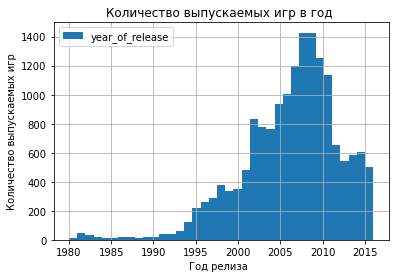

In [46]:
# Теперь визуализируем данный при помощи гистограммы
(data['year_of_release']
 .hist(bins= 37, legend=True, )
 .set(xlabel='Год релиза  ', ylabel='Количество выпускаемых игр' )
)
plt.title('Количество выпускаемых игр в год ')
plt.show()

Видим, что больше всего продаж в 2008 и 2009 годы. Наблюдаются скачки продаж после 1993 и 2000 годов

#### Посмотрим, как менялись продажи по платформам.

In [47]:
# Для этого сделаем сводную таблицу по столбцам с платформами и общими продажами
data.pivot_table(index='platform', values='total_sales',  aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Видим что самые прибыльные платформы за весь период это «PS2» «X360», «PS3» и «Wii» 

In [48]:
# Создадим выборку отдельно по каждой из наиболее прибыльных платформ
only_PS2=data [data.platform=='PS2']
only_X360=data [data.platform=='X360']
only_PS3=data [data.platform=='PS3']
only_Wii=data [data.platform=='Wii']
only_DS=data [data.platform=='DS']
only_PS=data [data.platform=='PS']
only_PS4=data [data.platform=='PS4']

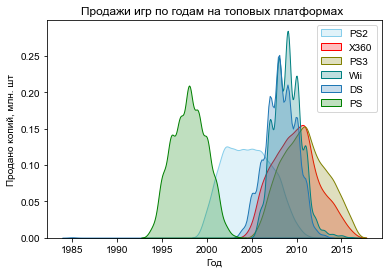

In [49]:
# Построим графики продаж по годам на наиболее прибыльных платформах
sns.kdeplot(data=only_PS2, x="year_of_release", color="skyblue", label="PS2", shade=True )
sns.kdeplot(data=only_X360, x="year_of_release", color="red", label="X360" , shade=True)
sns.kdeplot(data=only_PS3, x="year_of_release", color="olive", label="PS3", shade=True)
sns.kdeplot(data=only_Wii, x="year_of_release", color="teal", label="Wii", shade=True)
sns.kdeplot(data=only_DS, x="year_of_release",  label="DS", shade=True)
sns.kdeplot(data=only_PS, x="year_of_release", color="green", label="PS", shade=True)
plt.legend() 
plt.title('Продажи игр по годам на топовых платформах ')
plt.xlabel('Год')
plt.ylabel("Продано копий, млн. шт")
sns.set(rc={'figure.figsize':(20,15)})

Видим что срок «жизни» платформы около 10 лет, возможно это связано с выходом платформ нового поколения, проверим это предположение построив график продаж платформ одного производителя но разного поколения, возьмём платформу от сони, по ней больше данных

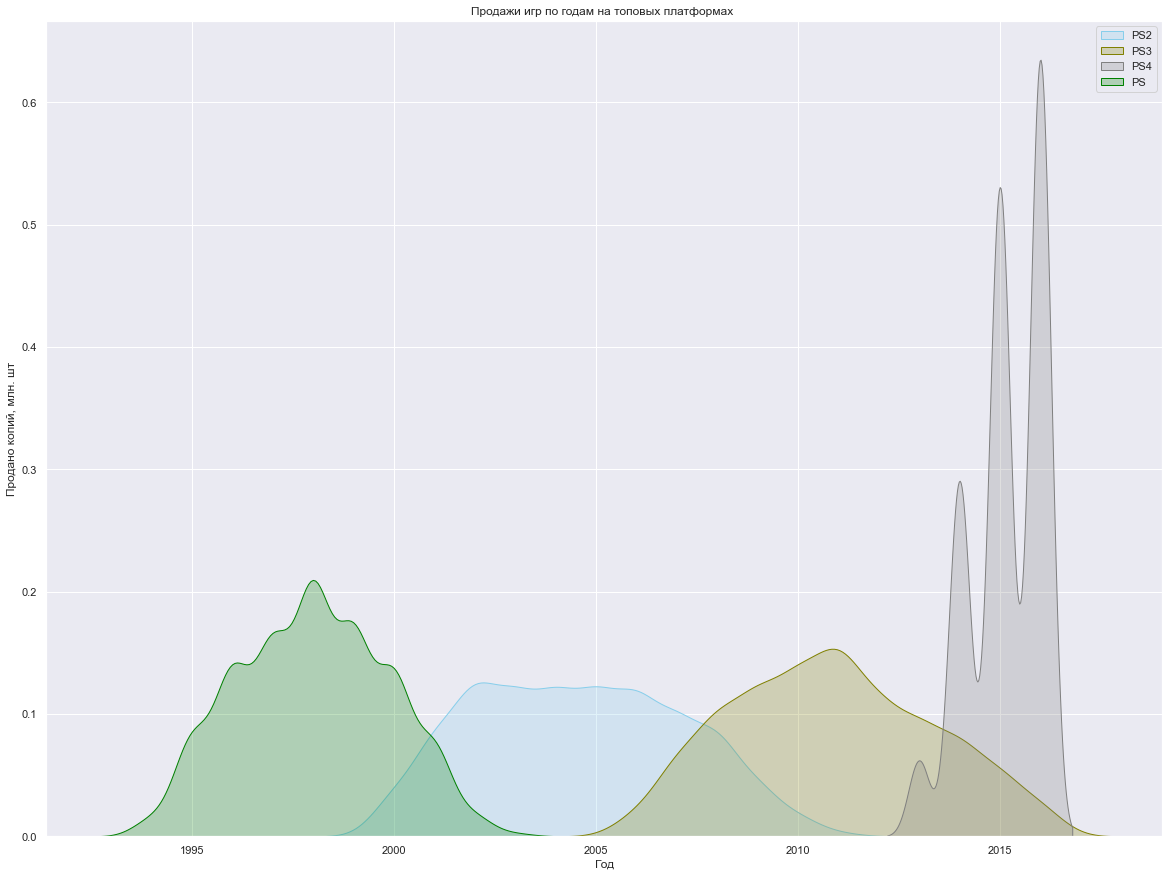

In [50]:
sns.kdeplot(data=only_PS2, x="year_of_release", color="skyblue", label="PS2", shade=True )
sns.kdeplot(data=only_PS3, x="year_of_release", color="olive", label="PS3", shade=True)
sns.kdeplot(data=only_PS4, x="year_of_release", color="gray", label="PS4", shade=True)
sns.kdeplot(data=only_PS, x="year_of_release", color="green", label="PS", shade=True)
plt.legend() 
plt.title('Продажи игр по годам на топовых платформах ')
plt.xlabel('Год')
plt.ylabel("Продано копий, млн. шт")
sns.set(rc={'figure.figsize':(20,15)})

На графике наглядно видим, что при входе платформы нового поколения падают продаже поколения предыдущего. 
Платформа «PS4» резко обрывается так как данные только до 2016 года.  


In [51]:
period_after_2011 = data [data.year_of_release>=2011]


Для дальнейшего анализа выберем данные за актуальный период, исходя из предыдущего анализа видим что период составляет 10 лет  в связи с этим возьмём данные не ранее 2011 года что бы не брать в расчёт данные на  платформы которые уже прошли свой жизненный цикл  

In [52]:
period_after_2011.pivot_table(index='platform', values='total_sales',  aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32
PC,97.68
Wii,95.02
WiiU,82.19
PSV,53.81


Посмотрим какие платформы самые прибыльные за выбранный период  

In [53]:
# Создадим переменную для каждой из интересующих нас платформ за выбранный период
PS3_after_2011=period_after_2011 [period_after_2011.platform=='PS3']
X360_after_2011=period_after_2011 [period_after_2011.platform=='X360']
PS4_after_2011=period_after_2011 [period_after_2011.platform=='PS4']
DS3_after_2011=period_after_2011 [period_after_2011.platform=='3DS']
XOne_after_2011=period_after_2011 [period_after_2011.platform=='XOne']
PC_after_2011=period_after_2011 [period_after_2011.platform=='PC']
Wii_after_2011=period_after_2011 [period_after_2011.platform=='Wii']
WiiU_after_2011=period_after_2011 [period_after_2011.platform=='WiiU']

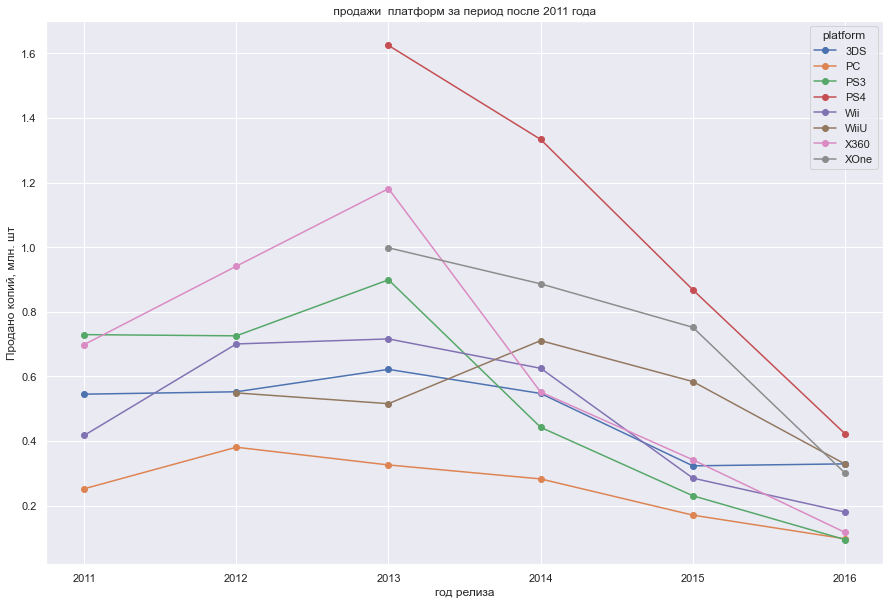

In [54]:
(period_after_2011.pivot_table(index='year_of_release', values='total_sales', columns = 'platform' )
 .drop(['DS','PS2','PSP','PSV'] ,axis=1)
 .plot(style='o-',figsize=(15, 10),
    title=' продажи  платформ за период после 2011 года ',   
    xlabel='год релиза', 
    ylabel="Продано копий, млн. шт")
)
plt.show()


Проанализировав графики видим что самые перспективные платформы это "PS4", "3DS" ,"XOne",  "WiiU" "PC". Так же мы видим падение продаж по всем платформам после 2014 года    

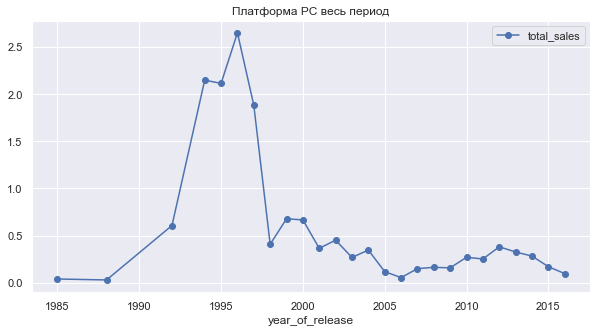

In [55]:
PC_always=data [data.platform=='PC']
PC_always.pivot_table(index='year_of_release', values='total_sales').plot(style='o-',grid=True, figsize=(10, 5), title='Платформа PC весь период')
plt.show()

Отдельно посмотрим PC  за весь период так как на бытовом уровне мы знаем что он с нами давно 

#### Построим график «ящик с усами» по продажам игр в разбивке по платформам

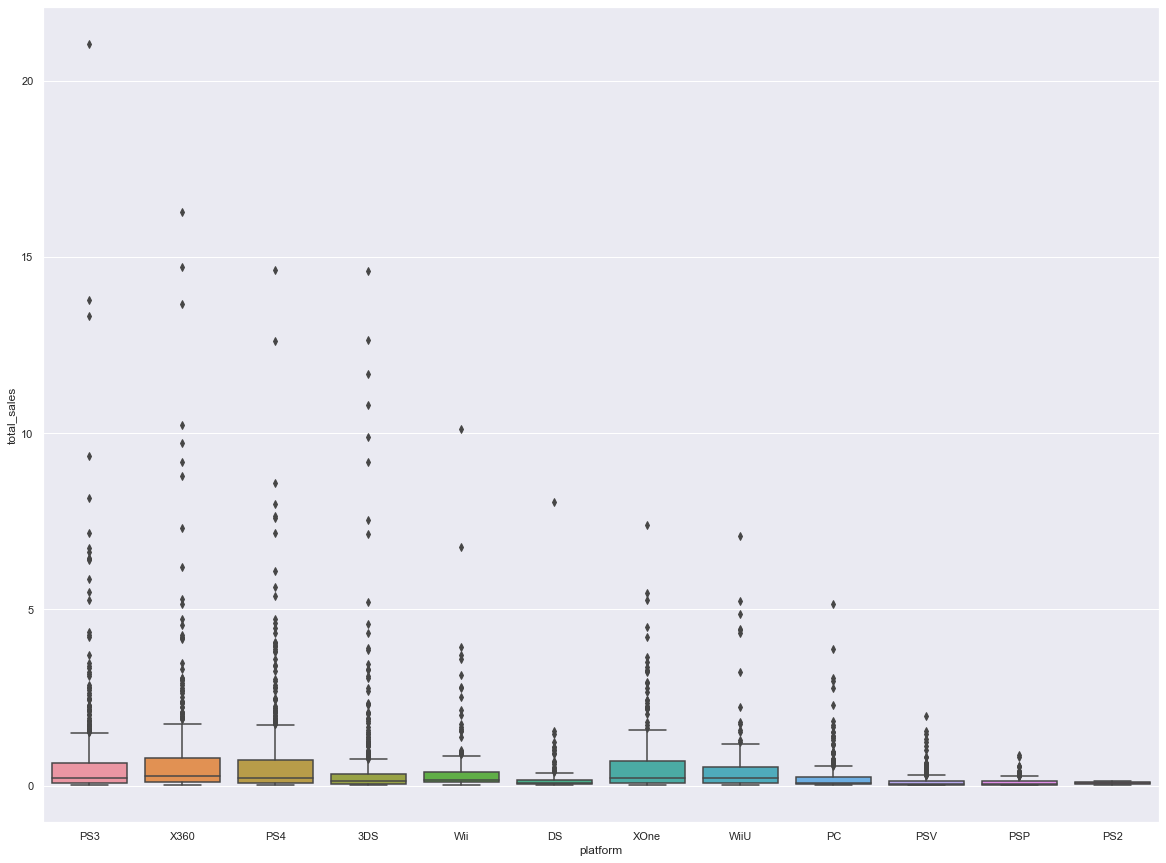

In [56]:
sns.boxplot( x=period_after_2011["platform"], y=period_after_2011["total_sales"] )
plt.show()

Видим большое количество выбросов но остальные данные плохо различимы, ограничим выборку по оси Y

(0.0, 2.0)

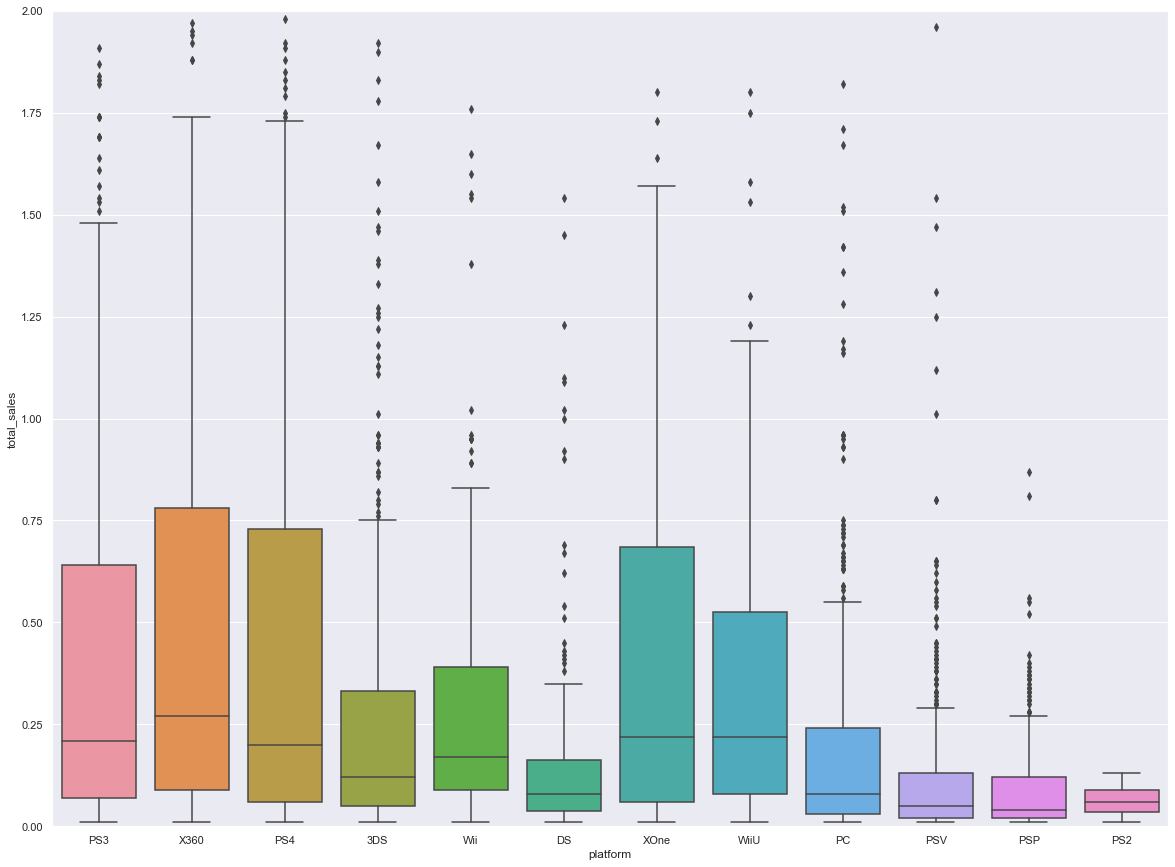

In [57]:
sns.boxplot( x=period_after_2011["platform"], y=period_after_2011["total_sales"] )
plt.ylim([0,2])


По всем платформам видим выбросы и смешение медианы ближе к нижней квартиле. Из чего делаем вывод что большая платность продаж ниже медианного значения по всем платформам то есть на всех платформах есть большое количество игр с небольшими продажами.
Выбросы говорят о том что на каждой платформе есть игры с очень большими продажами  

#### Посмотрим, как влияют на продажи популярной платформы отзывы пользователей и критиков.

Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

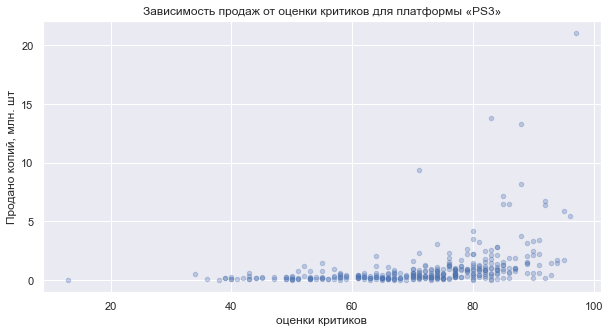

In [58]:
(PS3_after_2011.plot
    (kind ='scatter',x='critic_score', y='total_sales',grid=True, figsize=(10, 5), color="b",  alpha=0.3, 
     title='Зависимость продаж от оценки критиков для платформы «PS3»', 
     xlabel='оценки критиков', 
     ylabel="Продано копий, млн. шт")
)
plt.show()

Глядя на график разброса видим зависимость между оценкой критиков и продажами, но для удобства восприятия увеличим часть графика

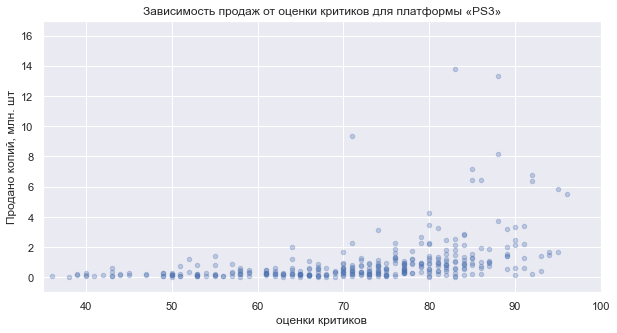

In [59]:
(PS3_after_2011.plot
 (kind='scatter',x='critic_score', y='total_sales',grid=True, figsize=(10, 5), color="b", 
  xlim=(35, 100), ylim=(-1, 17), alpha=0.3,
  title='Зависимость продаж от оценки критиков для платформы «PS3»',
  xlabel='оценки критиков', 
  ylabel="Продано копий, млн. шт")
)
plt.show()

Тенденция прослеживается, посмотрим на корреляцию Пирсона

In [60]:
PS3_after_2011['critic_score'].corr(data['total_sales'])

0.38011114718290734

Кооперация Пирсона так же показывает зависимость продаж от оценки критиков

Проведём те же действия с оценками пользователей 


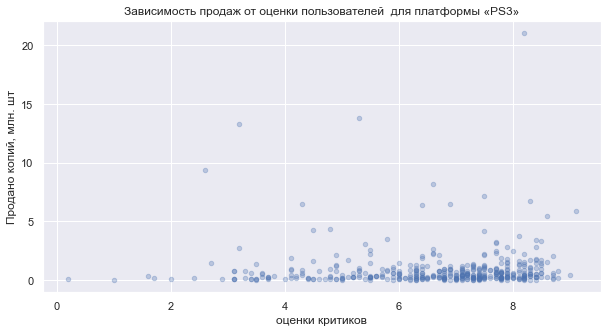

In [61]:
(PS3_after_2011.plot
 (kind='scatter',x='user_score', y='total_sales',grid=True, figsize=(10, 5), color="b",  alpha=0.3, 
  title='Зависимость продаж от оценки пользователей  для платформы «PS3»',
  xlabel='оценки критиков', 
  ylabel="Продано копий, млн. шт")
)
plt.show()

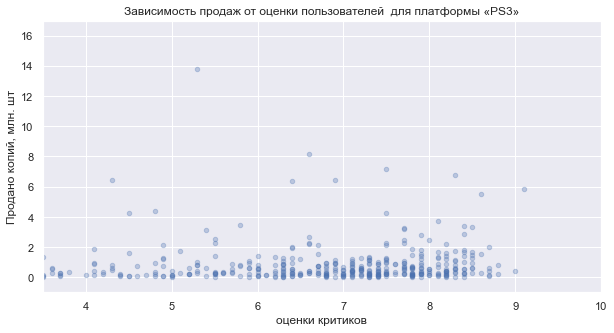

In [62]:
(PS3_after_2011.plot
 (kind='scatter',x='user_score', y='total_sales',grid=True, figsize=(10, 5), color="b",
  xlim=(3.5, 10), ylim=(-1, 17), alpha=0.3, 
  title='Зависимость продаж от оценки пользователей  для платформы «PS3»',      
  xlabel='оценки критиков', 
  ylabel="Продано копий, млн. шт")
 )
plt.show()

In [63]:
PS3_after_2011['user_score'].corr(data['total_sales'])

0.01408934830801942

Диаграмма рассеивания показывает меньшую зависимость продаж от оценки критиков а  кооперация Пирсона почти не видит зависимости 

Можем сделать вывод что оценки критиков влияют на продажи сильнее чес оценки пользователей  

Посмотрим как обстоят дела с другими популярными платформами   

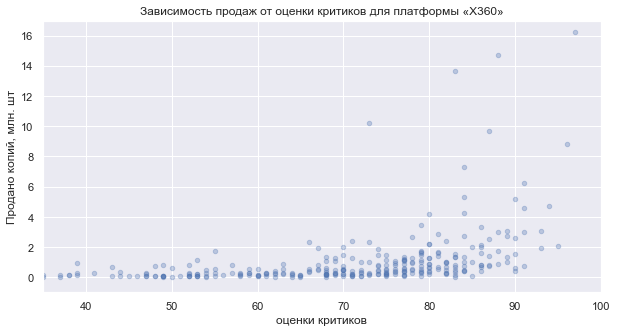

In [64]:
(X360_after_2011.plot
 (kind='scatter',x='critic_score', y='total_sales',grid=True, figsize=(10, 5), color="b", 
  xlim=(35, 100), ylim=(-1, 17), alpha=0.3, 
  title='Зависимость продаж от оценки критиков для платформы «X360»',     
  xlabel='оценки критиков', 
  ylabel="Продано копий, млн. шт")
)
plt.show()

In [65]:
X360_after_2011['critic_score'].corr(data['total_sales'])

0.39125332454845557

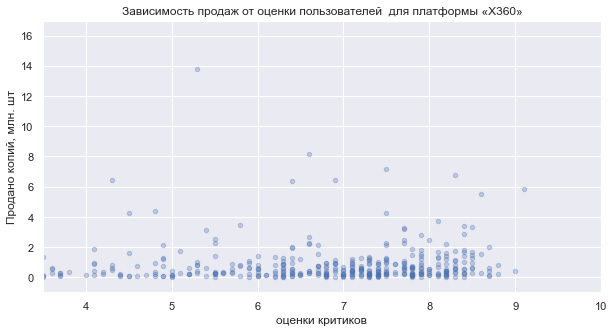

In [66]:
(PS3_after_2011.plot
 (kind='scatter',x='user_score', y='total_sales',grid=True, figsize=(10, 5), color="b", 
  xlim=(3.5, 10), ylim=(-1, 17), alpha=0.3, 
  title='Зависимость продаж от оценки пользователей  для платформы «X360»',
  xlabel='оценки критиков', 
  ylabel="Продано копий, млн. шт")
)
plt.show()

In [67]:
X360_after_2011['user_score'].corr(data['total_sales'])

0.038918170729102614

X360 ситуация аналогичная    

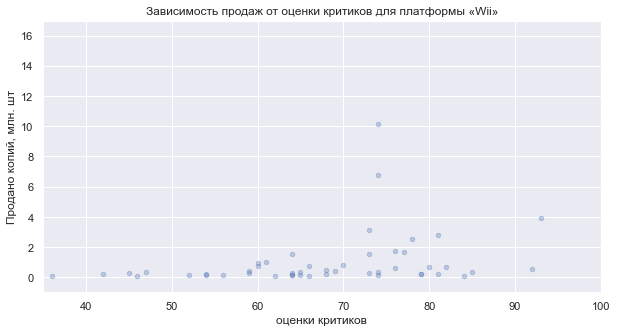

In [68]:
(Wii_after_2011.plot
 (kind='scatter',x='critic_score', y='total_sales',grid=True, figsize=(10, 5), color="b", 
  xlim=(35, 100), ylim=(-1, 17), alpha=0.3, 
  title='Зависимость продаж от оценки критиков для платформы «Wii»',      
  xlabel='оценки критиков', 
  ylabel="Продано копий, млн. шт")
)
plt.show()

In [69]:
Wii_after_2011['critic_score'].corr(data['total_sales'])

0.29226949542729336

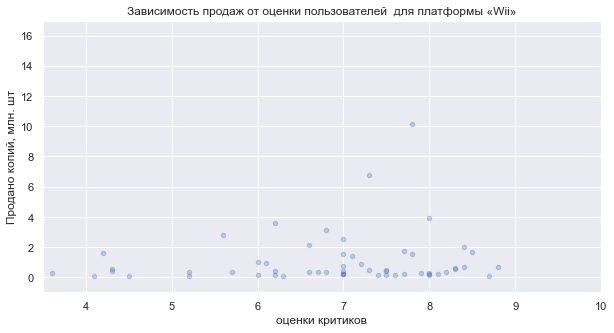

In [70]:
(Wii_after_2011.plot
 (kind='scatter',x='user_score', y='total_sales',grid=True, figsize=(10, 5), color="b", 
  xlim=(3.5, 10), ylim=(-1, 17), alpha=0.3, 
  title='Зависимость продаж от оценки пользователей  для платформы «Wii»',     
  xlabel='оценки критиков', 
  ylabel="Продано копий, млн. шт")
                    )
plt.show()

In [71]:
Wii_after_2011['user_score'].corr(data['total_sales'])

0.14550376734945006

Wii Зависимость продаж от оценок критиков заметно сократилась     

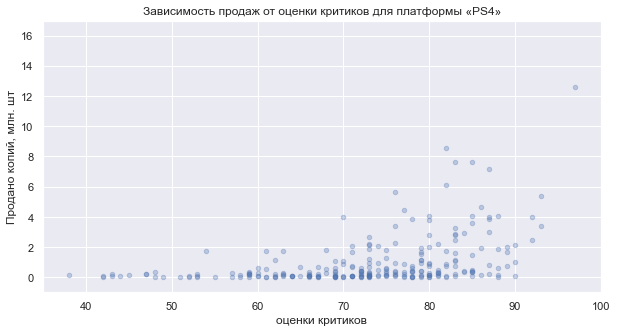

In [72]:
(PS4_after_2011.plot
 (kind='scatter',x='critic_score', y='total_sales',grid=True, figsize=(10, 5), color="b", 
  xlim=(35, 100), ylim=(-1, 17), alpha=0.3, 
  title='Зависимость продаж от оценки критиков для платформы «PS4»',     
  xlabel='оценки критиков', 
  ylabel="Продано копий, млн. шт")
)
plt.show()

In [73]:
PS4_after_2011['critic_score'].corr(data['total_sales'])

0.40656790206178123

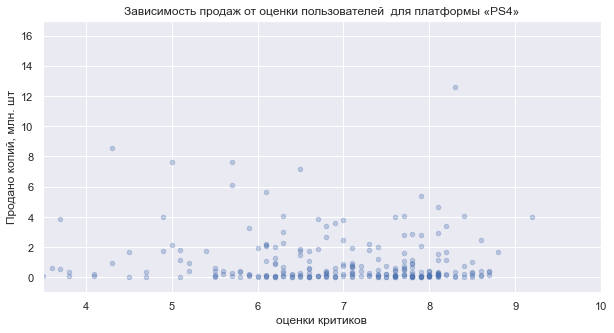

In [74]:
(PS4_after_2011.plot
 (kind='scatter',x='user_score', y='total_sales',grid=True, figsize=(10, 5), color="b", 
  xlim=(3.5, 10), ylim=(-1, 17), alpha=0.3, 
  title='Зависимость продаж от оценки пользователей  для платформы «PS4»',     
  xlabel='оценки критиков', 
  ylabel="Продано копий, млн. шт")
)
plt.show()

In [75]:
PS4_after_2011['user_score'].corr(data['total_sales'])

-0.03195711020455644

PS4 Ситуация аналогична PS3 и Х360     

Можем сделать вывод что на продажи влияют оценки критиков, а вот оценки пользователей не оказывают почти что никакого эффекта      

#### Посмотрим как влияют жанры игр на их продажи       

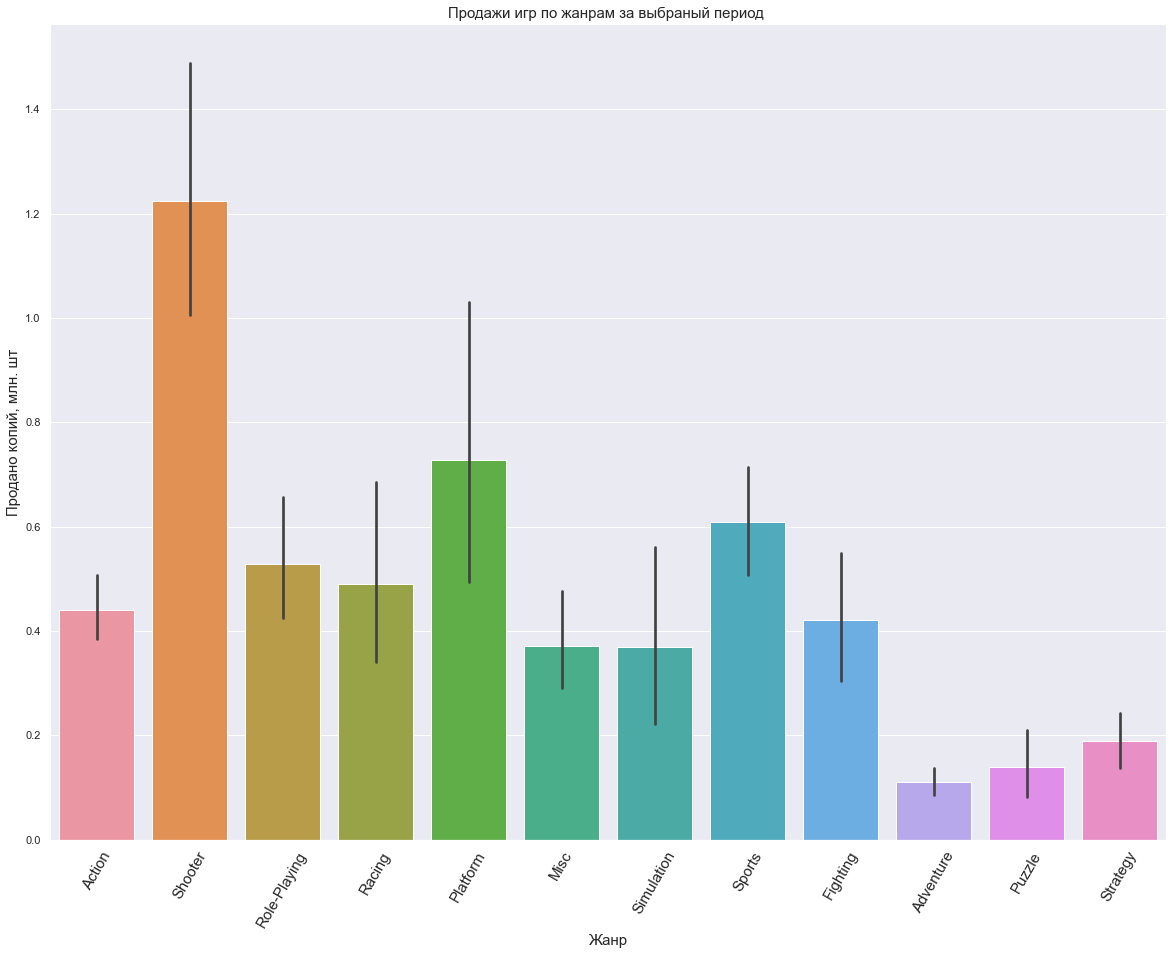

In [76]:
# Построим диаграмму продаж по жанрам за выбранный нами период 
sns.barplot(data=period_after_2011, x="genre", y="total_sales")
plt.xticks(rotation=60 ,fontsize = 15)
plt.title('Продажи игр по жанрам за выбраный период ',fontsize = 15)
plt.xlabel('Жанр' ,fontsize = 15)
plt.ylabel("Продано копий, млн. шт",fontsize = 15)

plt.show()

Шутеры, платформеры, и спортивные игры — это лидеры продаж. Причём шутеры с хорошим отрывом  
Пазлы,  приключения и стратегии продаются плохо. 


#### Составьте портрет пользователя каждого региона

In [77]:
# Отсортируем топ 5 платформ по каждому из регионов за весть период и отдельно за выбранный нами ранее период 

print ('топ 5 платформ за весь период по Северной Америке')
display (data.pivot_table(index='platform', values='na_sales',  aggfunc='sum')
  .sort_values(by='na_sales', ascending=False).reset_index().head())

print ('топ 5 платформ за весь период по Европе')
display (data.pivot_table(index='platform', values='eu_sales',  aggfunc='sum')
  .sort_values(by='eu_sales', ascending=False).reset_index().head())

print ('топ 5 платформ за весь период по Японии')
display (data.pivot_table(index='platform', values='jp_sales',  aggfunc='sum')
  .sort_values(by='jp_sales', ascending=False).reset_index().head())

print ('топ 5 платформ за весь период по другим странам')
display (data.pivot_table(index='platform', values='other_sales',  aggfunc='sum')
  .sort_values(by='other_sales', ascending=False).reset_index().head())


топ 5 платформ за весь период по Северной Америке


,platform,na_sales
0,X360,595.74
1,PS2,572.92
2,Wii,486.87
3,PS3,390.13
4,DS,380.31


топ 5 платформ за весь период по Европе


,platform,eu_sales
0,PS2,332.63
1,PS3,327.21
2,X360,268.32
3,Wii,258.32
4,PS,212.39


топ 5 платформ за весь период по Японии


,platform,jp_sales
0,DS,175.02
1,PS,139.78
2,PS2,137.54
3,SNES,116.55
4,3DS,100.62


топ 5 платформ за весь период по другим странам


,platform,other_sales
0,PS2,190.47
1,PS3,134.59
2,X360,84.88
3,Wii,77.71
4,DS,59.04


Теперь для удобства восприятия объединим все таблицы в один график 

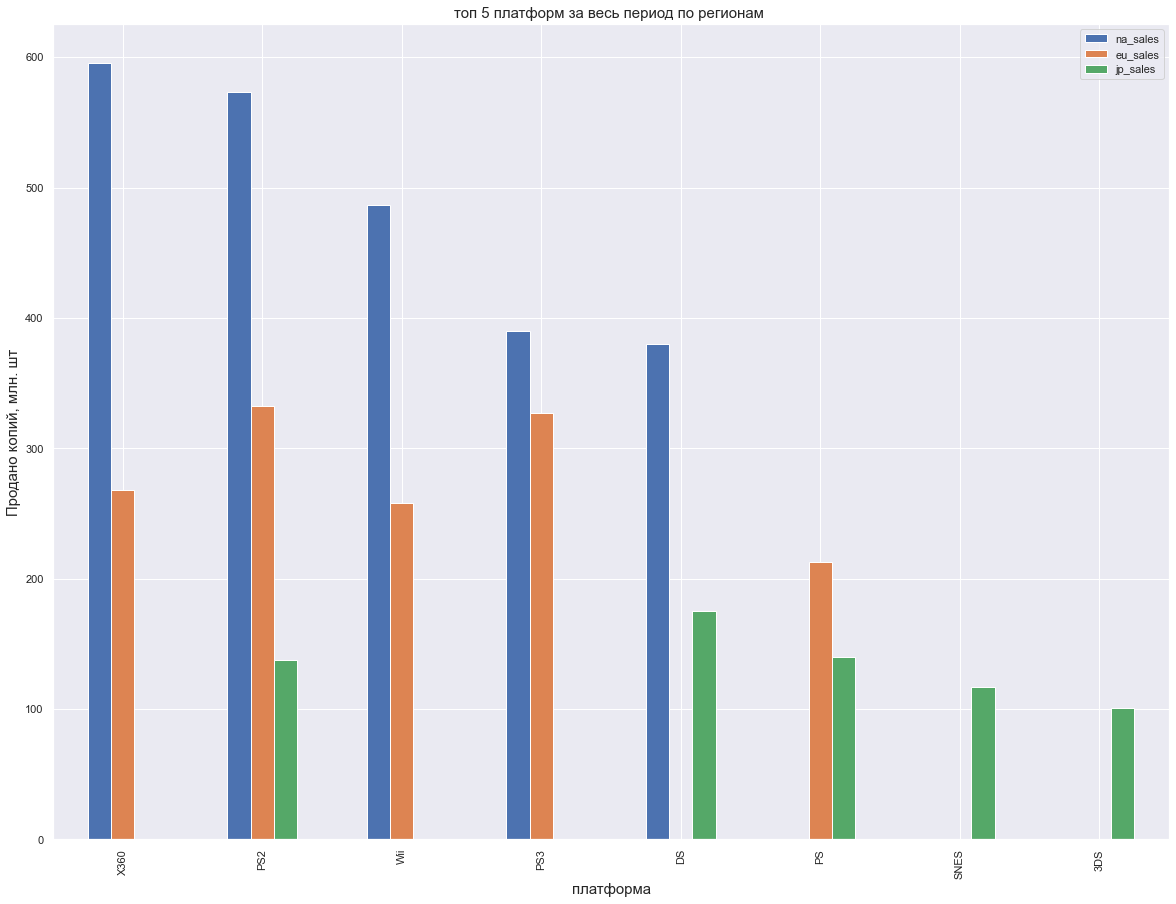

In [78]:
na = data.pivot_table(index='platform', values='na_sales',  aggfunc='sum')\
  .sort_values(by='na_sales', ascending=False).reset_index().head()

eu = data.pivot_table(index='platform', values='eu_sales',  aggfunc='sum')\
  .sort_values(by='eu_sales', ascending=False).reset_index().head()

jp = data.pivot_table(index='platform', values='jp_sales',  aggfunc='sum')\
  .sort_values(by='jp_sales', ascending=False).reset_index().head()

temp = na.merge(eu, how='outer', on='platform')\
    .merge(jp, how='outer', on='platform')
temp.plot(kind='bar', x='platform')

plt.title('топ 5 платформ за весь период по регионам ',fontsize = 15)
plt.xlabel('платформа' ,fontsize = 15)
plt.ylabel("Продано копий, млн. шт",fontsize = 15)

plt.show()

In [79]:

print ('топ 5 платформ с 2011года по Северной Америке')
display (period_after_2011.pivot_table(index='platform', values='na_sales',  aggfunc='sum')
  .sort_values(by='na_sales', ascending=False).reset_index().head())

print ('топ 5 платформ с 2011года по Европе')
display (period_after_2011.pivot_table(index='platform', values='eu_sales',  aggfunc='sum')
  .sort_values(by='eu_sales', ascending=False).reset_index().head())

print ('топ 5 платформ с 2011года по Японии')
display (period_after_2011.pivot_table(index='platform', values='jp_sales',  aggfunc='sum')
  .sort_values(by='jp_sales', ascending=False).reset_index().head())

print ('топ 5 платформ зс 2011года по другим странам')
display (period_after_2011.pivot_table(index='platform', values='other_sales',  aggfunc='sum')
  .sort_values(by='other_sales', ascending=False).reset_index().head())


топ 5 платформ с 2011года по Северной Америке


,platform,na_sales
0,X360,226.80
1,PS3,168.26
2,PS4,108.74
3,XOne,93.12
4,3DS,82.65


топ 5 платформ с 2011года по Европе


,platform,eu_sales
0,PS3,163.10
1,PS4,141.09
2,X360,117.10
3,3DS,61.27
4,PC,56.70


топ 5 платформ с 2011года по Японии


,platform,jp_sales
0,3DS,100.62
1,PS3,49.39
2,PSP,24.04
3,PSV,21.84
4,PS4,15.96


топ 5 платформ зс 2011года по другим странам


,platform,other_sales
0,PS3,64.82
1,PS4,48.35
2,X360,33.13
3,XOne,14.27
4,3DS,13.27


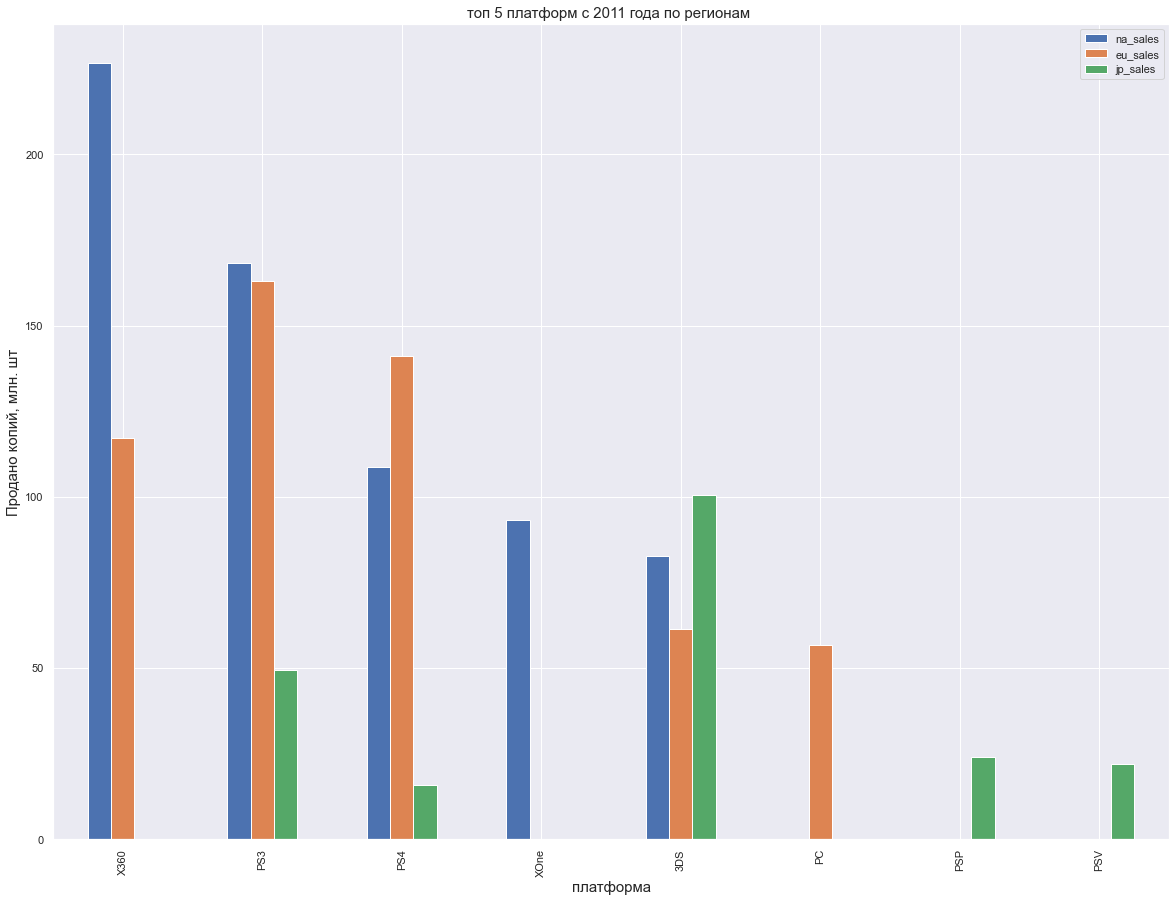

In [80]:
na = period_after_2011.pivot_table(index='platform', values='na_sales',  aggfunc='sum')\
  .sort_values(by='na_sales', ascending=False).reset_index().head()

eu = period_after_2011.pivot_table(index='platform', values='eu_sales',  aggfunc='sum')\
  .sort_values(by='eu_sales', ascending=False).reset_index().head()

jp = period_after_2011.pivot_table(index='platform', values='jp_sales',  aggfunc='sum')\
  .sort_values(by='jp_sales', ascending=False).reset_index().head()

temp = na.merge(eu, how='outer', on='platform')\
    .merge(jp, how='outer', on='platform')
temp.plot(kind='bar', x='platform')

plt.title('топ 5 платформ с 2011 года по регионам ',fontsize = 15)
plt.xlabel('платформа' ,fontsize = 15)
plt.ylabel("Продано копий, млн. шт",fontsize = 15)

plt.show()

Видим, что Америка больше любит х бокс а Европа и остальной мир больше предпочитают плейстейшен. В Японии своя атмосфера. Причём данные сходи как за есть период, так и за данные после 2011 года 
Компьютеры появились в топе только однажды, после 2011 года в Европе


In [81]:
# Отсортируем топ 5 жанров по каждому из регионов за весть период и отдельно за выбранный нами ранее период

print ('топ 5 жанров за весь период по Северной Америке')
display (data.pivot_table(index='genre', values='na_sales',  aggfunc='sum')
  .sort_values(by='na_sales', ascending=False).reset_index().head())

print ('топ 5 жанров за весь период по Европе')
display (data.pivot_table(index='genre', values='eu_sales',  aggfunc='sum')
  .sort_values(by='eu_sales', ascending=False).reset_index().head())

print ('топ 5 жанров за весь период по Японии')
display (data.pivot_table(index='genre', values='jp_sales',  aggfunc='sum')
  .sort_values(by='jp_sales', ascending=False).reset_index().head())

print ('топ 5 жанров за весь период по другим странам')
display (data.pivot_table(index='genre', values='other_sales',  aggfunc='sum')
  .sort_values(by='other_sales', ascending=False).reset_index().head())

топ 5 жанров за весь период по Северной Америке


,genre,na_sales
0,Action,863.17
1,Sports,671.20
2,Shooter,584.83
3,Platform,444.44
4,Misc,399.57


топ 5 жанров за весь период по Европе


,genre,eu_sales
0,Action,510.99
1,Sports,371.33
2,Shooter,314.52
3,Racing,234.49
4,Misc,210.60


топ 5 жанров за весь период по Японии


,genre,jp_sales
0,Role-Playing,353.39
1,Action,160.14
2,Sports,134.93
3,Platform,130.71
4,Misc,107.02


топ 5 жанров за весь период по другим странам


,genre,other_sales
0,Action,182.22
1,Sports,132.21
2,Shooter,103.33
3,Racing,75.51
4,Misc,73.10


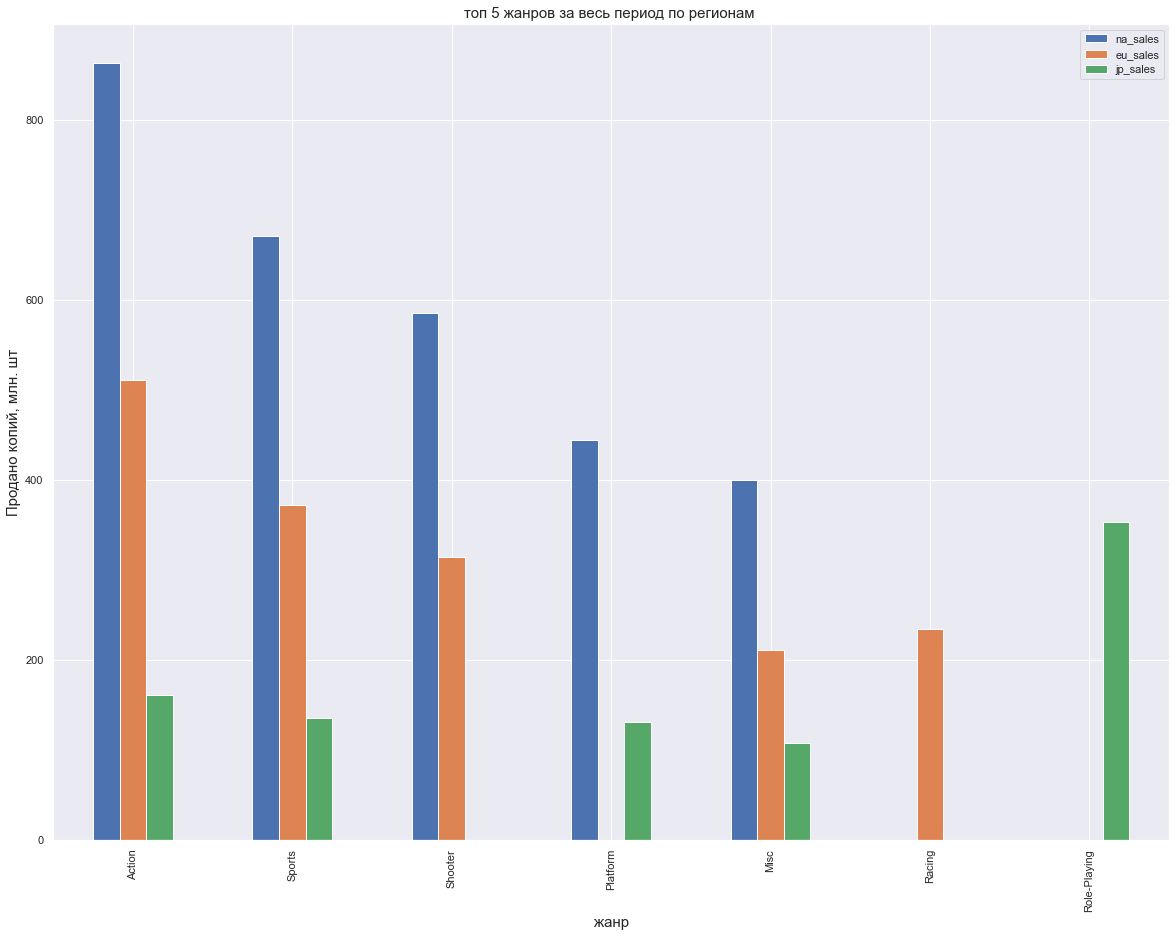

In [82]:
na = data.pivot_table(index='genre', values='na_sales',  aggfunc='sum')\
  .sort_values(by='na_sales', ascending=False).reset_index().head()

eu = data.pivot_table(index='genre', values='eu_sales',  aggfunc='sum')\
  .sort_values(by='eu_sales', ascending=False).reset_index().head()

jp = data.pivot_table(index='genre', values='jp_sales',  aggfunc='sum')\
  .sort_values(by='jp_sales', ascending=False).reset_index().head()

temp = na.merge(eu, how='outer', on='genre')\
    .merge(jp, how='outer', on='genre')
temp.plot(kind='bar', x='genre')

plt.title('топ 5 жанров за весь период по регионам ',fontsize = 15)
plt.xlabel('жанр' ,fontsize = 15)
plt.ylabel("Продано копий, млн. шт",fontsize = 15)

plt.show()

In [83]:

print ('топ 5 жанров с 2011года по Северной Америке')
display (period_after_2011.pivot_table(index='genre', values='na_sales',  aggfunc='sum')
  .sort_values(by='na_sales', ascending=False).reset_index().head())

print ('топ 5 жанров с 2011года по Европе')
display (period_after_2011.pivot_table(index='genre', values='eu_sales',  aggfunc='sum')
  .sort_values(by='eu_sales', ascending=False).reset_index().head())

print ('топ 5 жанров с 2011года по Японии')
display (period_after_2011.pivot_table(index='genre', values='jp_sales',  aggfunc='sum')
  .sort_values(by='jp_sales', ascending=False).reset_index().head())

print ('топ 5 жанров зс 2011года по другим странам')
display (period_after_2011.pivot_table(index='genre', values='other_sales',  aggfunc='sum')
  .sort_values(by='other_sales', ascending=False).reset_index().head())

топ 5 жанров с 2011года по Северной Америке


,genre,na_sales
0,Action,230.92
1,Shooter,194.43
2,Sports,108.70
3,Role-Playing,83.78
4,Misc,69.69


топ 5 жанров с 2011года по Европе


,genre,eu_sales
0,Action,199.12
1,Shooter,148.02
2,Sports,88.48
3,Role-Playing,62.30
4,Racing,40.58


топ 5 жанров с 2011года по Японии


,genre,jp_sales
0,Role-Playing,79.87
1,Action,63.62
2,Misc,17.60
3,Fighting,12.38
4,Platform,12.13


топ 5 жанров зс 2011года по другим странам


,genre,other_sales
0,Action,64.14
1,Shooter,48.54
2,Sports,28.88
3,Role-Playing,19.68
4,Misc,12.41


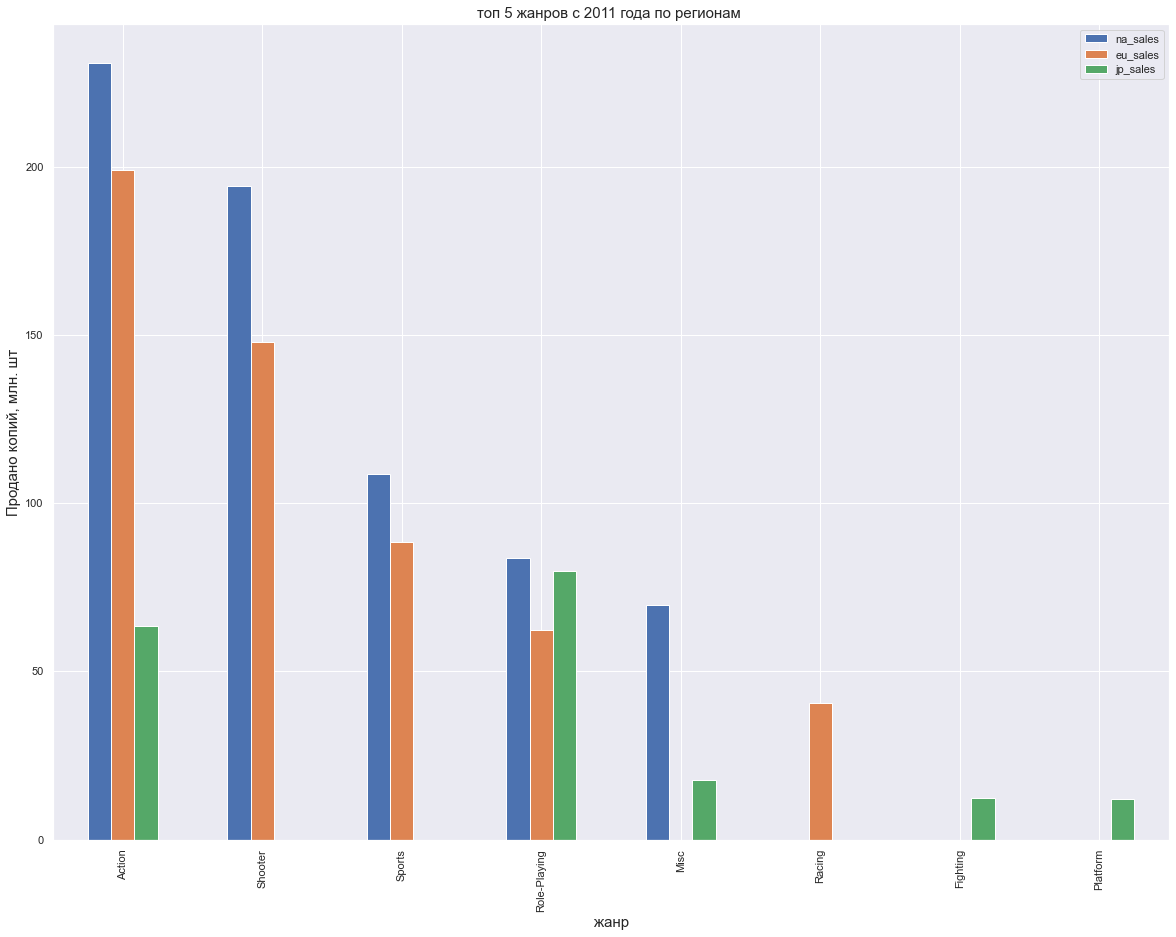

In [84]:
na = period_after_2011.pivot_table(index='genre', values='na_sales',  aggfunc='sum')\
  .sort_values(by='na_sales', ascending=False).reset_index().head()

eu = period_after_2011.pivot_table(index='genre', values='eu_sales',  aggfunc='sum')\
  .sort_values(by='eu_sales', ascending=False).reset_index().head()

jp = period_after_2011.pivot_table(index='genre', values='jp_sales',  aggfunc='sum')\
  .sort_values(by='jp_sales', ascending=False).reset_index().head()

temp = na.merge(eu, how='outer', on='genre')\
    .merge(jp, how='outer', on='genre')
temp.plot(kind='bar', x='genre')

plt.title('топ 5 жанров с 2011 года по регионам ',fontsize = 15)
plt.xlabel('жанр' ,fontsize = 15)
plt.ylabel("Продано копий, млн. шт",fontsize = 15)

plt.show()

По жанрам Америка, Европа и остальной мир показывают удивительное единение, топ 3 совпадает полностью как за весь период, так и после 2011 года.
А вот у Японии свой путь


In [85]:
# А теперь сделаем сортировку по рейтингу  и продажам в регионах
print ('Продажи игр в соответствии с возрастным рейтингом  с 2011 года по Северной Америке')
display (period_after_2011.pivot_table(index='rating', values='na_sales',  aggfunc='sum')
  .sort_values(by='na_sales', ascending=False).reset_index())

print ('Продажи игр в соответствии с возрастным рейтингом  с 2011 года по Европе')
display (period_after_2011.pivot_table(index='rating', values='eu_sales',  aggfunc='sum')
  .sort_values(by='eu_sales', ascending=False).reset_index())

print ('Продажи игр в соответствии с возрастным рейтингом  с 2011 года по Японии')
display (period_after_2011.pivot_table(index='rating', values='jp_sales',  aggfunc='sum')
  .sort_values(by='jp_sales', ascending=False).reset_index())

print ('Продажи игр в соответствии с возрастным рейтингом с 2011 года по другим странам')
display (period_after_2011.pivot_table(index='rating', values='other_sales',  aggfunc='sum')
  .sort_values(by='other_sales', ascending=False).reset_index())

Продажи игр в соответствии с возрастным рейтингом  с 2011 года по Северной Америке


,rating,na_sales
0,M,308.45
1,E,170.17
2,E10+,117.72
3,T,109.31
4,EC,0.42
5,RP,0.00


Продажи игр в соответствии с возрастным рейтингом  с 2011 года по Европе


,rating,eu_sales
0,M,250.26
1,E,141.73
2,T,83.16
3,E10+,78.00
4,RP,0.03
5,EC,0.00


Продажи игр в соответствии с возрастным рейтингом  с 2011 года по Японии


,rating,jp_sales
0,E,36.68
1,T,33.39
2,M,26.14
3,E10+,11.23
4,EC,0.00
5,RP,0.00


Продажи игр в соответствии с возрастным рейтингом с 2011 года по другим странам


,rating,other_sales
0,M,81.96
1,E,40.86
2,T,28.17
3,E10+,23.91
4,EC,0.03
5,RP,0.01


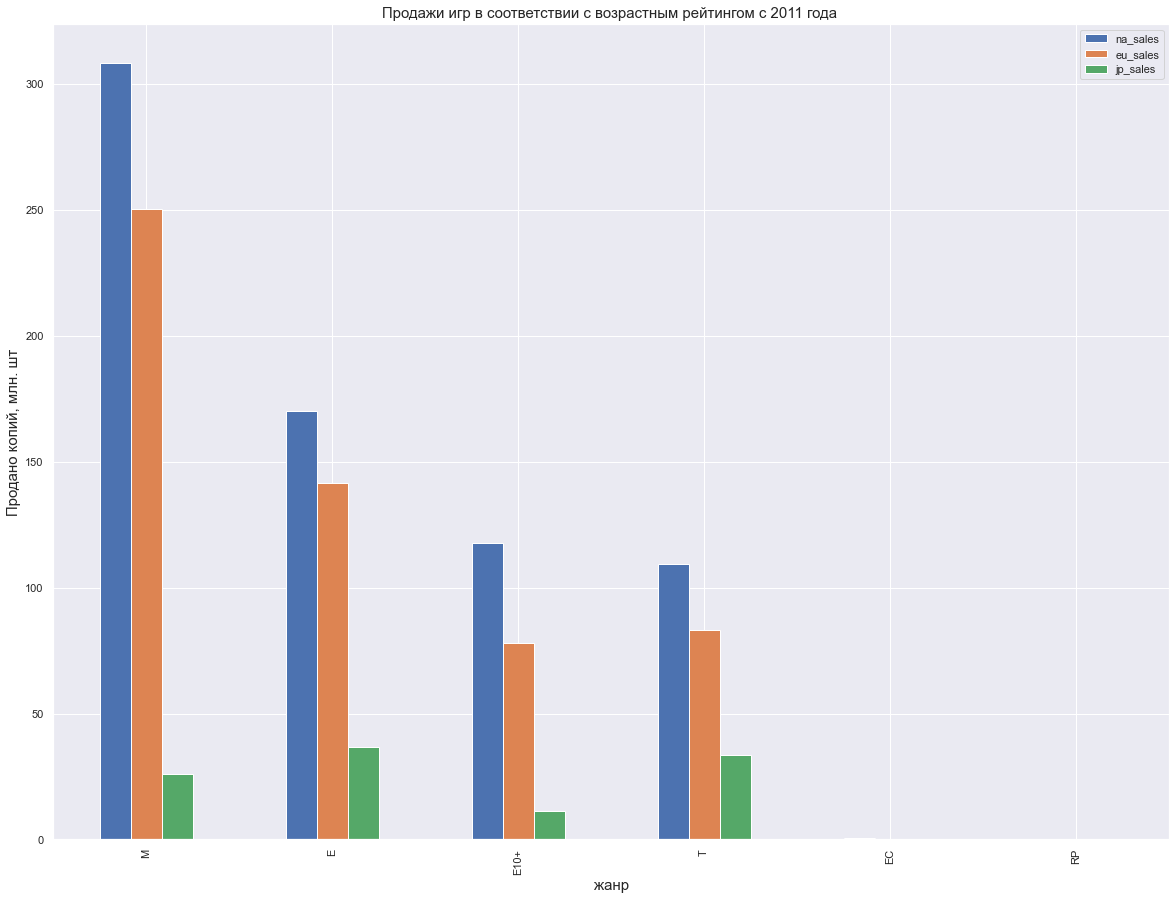

In [86]:
na = period_after_2011.pivot_table(index='rating', values='na_sales',  aggfunc='sum')\
  .sort_values(by='na_sales', ascending=False).reset_index().head()

eu = period_after_2011.pivot_table(index='rating', values='eu_sales',  aggfunc='sum')\
  .sort_values(by='eu_sales', ascending=False).reset_index().head()

jp = period_after_2011.pivot_table(index='rating', values='jp_sales',  aggfunc='sum')\
  .sort_values(by='jp_sales', ascending=False).reset_index().head()

temp = na.merge(eu, how='outer', on='rating')\
    .merge(jp, how='outer', on='rating')
temp.plot(kind='bar', x='rating')

plt.title('Продажи игр в соответствии с возрастным рейтингом с 2011 года ',fontsize = 15)
plt.xlabel('жанр' ,fontsize = 15)
plt.ylabel("Продано копий, млн. шт",fontsize = 15)

plt.show()

Видим отличия в продажах игр между всем миром и Японией.  В Японии предпочитают больше покупать игры категории Е (для всех), а вот в остальном мире больше предпочитают М (17+). Что не удивительно после проведённого анализа по жанрам. 

После проведения анализа пользователей видим большие отличия пользователей из Японии от пользователей из остального мира. В Японии предпочитают свои консоль, другие жанры и игры более мягкого рейтинга.

Между Европой и Америкой отличия только в предпочитаемых консолях. Так в Америке любят х-бокс а в Европе плейстейшн


#### Проверка гипотез 

Для начала сформулируем гипотезы 
Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [87]:

#Проверим гипотезу о том что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


# Для начала сделаем сводную таблицу по интересующим нас данным   
display (data.query('platform in ["XOne", "PC"]')
         .pivot_table(index= 'platform', values='user_score',  aggfunc='mean')
         .reset_index()
        )

#Приступаем непосредственно к проверке гипотезы    
# Подготовим данные, оставим только рейтинги по интересующим нас платформам  удалим значения
xbox_one_user_score= data.query('platform == "XOne"')['user_score'].dropna()



# Для PC повторим действия что и для xbox 
pc_user_score= data.query('platform == "PC"')['user_score'].dropna()



alpha = 0.05 #  поставим значение  alpha равное 5%. то есть критический уровень статистической значимости для нулевой гипотизы

results = st.ttest_ind(
    xbox_one_user_score, 
    pc_user_score,
    equal_var = False ) # Применяем значение False так как выборки не равны  


print('p-значение:', results.pvalue ) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу о том что рейтинги платформ Xbox One и PC одинаковые")
else:
    print("Не получилось отвергнуть нулевую гипотезу о том что рейтинги платформ Xbox One и PC одинаковые")
    

,platform,user_score
0,PC,7.065960
1,XOne,6.521429


p-значение: 4.5385802963771776e-06
Отвергаем нулевую гипотезу о том что рейтинги платформ Xbox One и PC одинаковые


Мы выдвинули гипотезу о том что рейтинг на платформах PC  и XOne одинаковые. Проведя исследования, мы опровергли данную гипотезу

In [88]:
# посчитаем дисперсию для изучаемых платформ  
print ('дисперсия оценок критиков для птатформы xbox_one состовляет')
display (np.var(xbox_one_user_score))
print()
print ('дисперсия оценок критиков для pc состовляет')
display (np.var(pc_user_score))



дисперсия оценок критиков для птатформы xbox_one состовляет


1.8965188383045533


дисперсия оценок критиков для pc состовляет


2.3461128196131775

In [89]:
#  и стандартное отклонение   
print ('стандартное отклонение оценок критиков для птатформы xbox_one состовляет')
display (np.std(xbox_one_user_score))
print()
print ('стандартное отклонение оценок критиков для pc состовляет')
display (np.std(pc_user_score))

стандартное отклонение оценок критиков для птатформы xbox_one состовляет


1.3771415462124992


стандартное отклонение оценок критиков для pc состовляет


1.5317025884985562

Формулируем гипотезы 
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action  и Sports разные.
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action  и Sports одинаковые .


In [90]:

#Проверим гипотезу о том что Средние пользовательские рейтинги жанров Action и Sports одинаковые

display (data.query('genre in ["Action", "Sports"]')
         .pivot_table(index= 'genre', values='user_score',  aggfunc='mean')
         .reset_index()
        )



action_user_score= data.query('genre == "Action"')['user_score'].dropna()


sports_user_score= data.query('genre == "Sports"')['user_score'].dropna()




alpha = .05 

results = st.ttest_ind(
    action_user_score, 
    sports_user_score, 
    equal_var = False)


print('p-значение:', results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу о том что рейтинги жанров Action и Sports разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу о том что рейтинги жанров Action и Sports разные")

,genre,user_score
0,Action,7.058129
1,Sports,6.951434


p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу о том что рейтинги жанров Action и Sports разные


Мы выдвинули гипотезу о том что рейтинг на по жанрам  Action и Sports разные. Проведя исследования, мы не смогли опровергнуть данную гипотезу 

### Общий вывод

Проведя исследования можно сделать вывод что 
1.	Платформы имеют свой срок «жизни» и нет смысла вкладывается в игры на устаревших платформах. Единственно исключение это PC которые за последние 15 лет показывает себя стабильно 
2.	На всех платформах продажи смещены ниже медианных значений, но есть выбросы по каждой платформе. Получается у каждой платформы есть как несомненные хиты, так и много проходняка
3.	Отзывы критиков на продажи оказывают влияние, а вот отзывы пользователей нет
4.	Самые популярные жанры это шутеры с заметным отрывом, затем уже платформы и спорт. Но есть сильная региональная зависимость, в Японии более популярны ролёвки
5.	Популярные платформы это playstation и Xbox во всех странах кроме Японии 

При выборе оптимальной стратегии развития на 2017 год необходимо определиться с потенциальным рынком сбыта. Исходя из этого будет понятен наиболее подходящая платформа, жанр и можно будет подобрать оптимальный рейтинг 
